En este experimento se aplica el algoritmo K-Means, un método de aprendizaje no supervisado que se utiliza para agrupar datos según su similitud.
El objetivo es identificar patrones naturales dentro del conjunto de datos Food_Delivery_Times.csv.

Variables del modelo

- Variables independientes (factores de entrada):
Son las características utilizadas para formar los grupos.
En este caso corresponden a:
Distance_km, Weather, Traffic_Level, Time_of_Day, Vehicle_Type, Preparation_Time_min, y Courier_Experience_yrs.

- Factores controlables (hiperparámetros):
Son los parámetros que se pueden ajustar manualmente para mejorar los resultados:

 * n_clusters: define la cantidad de grupos que el modelo va a formar dentro del conjunto de datos.

 * init: determina cómo se eligen los puntos centrales iniciales de los grupos (también llamados centroides, que son los puntos que representan el centro de cada grupo).
Un mal punto inicial puede formar grupos incorrectos, por eso este parámetro ayuda a elegirlos de manera más adecuada.

 * max_iter: indica el número máximo de veces que el modelo puede ajustar los grupos.
En cada iteración el modelo reorganiza los datos y mueve los puntos centrales hasta que los grupos quedan bien definidos o hasta que alcanza el límite de repeticiones.

- Factores no controlables:
Son aspectos que no dependen directamente del usuario, como:

 * La distribución real de los datos.

 * La posición inicial aleatoria de los centroides (aunque puede controlarse parcialmente con random_state).

 * La variabilidad natural del dataset.

- Variable dependiente (salida):
Son las etiquetas de grupo o clúster que el modelo genera automáticamente (kmeans.labels_).
Cada registro termina perteneciendo a un grupo en función de su similitud con los demás.

Métrica de evaluación (error a medir)

El algoritmo K-Means no predice valores numéricos, sino que agrupa observaciones según su similitud.
Por eso, no se mide un error tradicional, sino una métrica de calidad de agrupamiento: el Silhouette Score, que indica qué tan bien están separados los grupos.

- Valores cercanos a 1 → buena separación entre grupos.

- Valores cercanos a 0 → grupos con solapamiento o poca separación.

- Valores negativos → puntos mal asignados a su grupo.

In [83]:
#librerias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
# Cargar los datos ya procesados
X_train = pd.read_csv('../datos/Train_X.csv')

# Mostrar las primeras filas
X_train.head()


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
0,0.674519,-1.280621,-0.855401,-1.623453,-1.277600,-0.912162,0.144426,1.532031
1,1.145159,-0.903984,2.031759,1.030679,-1.277600,1.374569,1.255133,0.836353
2,-0.855061,1.246721,-0.855401,1.030679,-0.232386,-0.912162,1.116295,0.140675
3,-0.792771,1.102402,0.588179,-0.296387,0.812827,1.374569,-1.243959,1.532031
4,1.349333,-0.840624,2.031759,-1.623453,-1.277600,1.374569,1.255133,1.184192


In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [86]:
X = df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [87]:
resultados = []

for n in [2, 3, 4, 5]:
    for init in ['k-means++', 'random']:
        for it in [100, 200, 300]:
            kmeans = KMeans(n_clusters=n, init=init, max_iter=it, random_state=42)
            kmeans.fit(X_scaled)
            score = silhouette_score(X_scaled, kmeans.labels_)
            resultados.append({'n_clusters': n, 'init': init, 'max_iter': it, 'silhouette': score})

# Mostrar resultados en tabla
resultados_df = pd.DataFrame(resultados)
print(resultados_df)

    n_clusters       init  max_iter  silhouette
0            2  k-means++       100    0.247178
1            2  k-means++       200    0.247178
2            2  k-means++       300    0.247178
3            2     random       100    0.247178
4            2     random       200    0.247178
5            2     random       300    0.247178
6            3  k-means++       100    0.246376
7            3  k-means++       200    0.246376
8            3  k-means++       300    0.246376
9            3     random       100    0.247123
10           3     random       200    0.247123
11           3     random       300    0.247123
12           4  k-means++       100    0.271838
13           4  k-means++       200    0.271838
14           4  k-means++       300    0.271838
15           4     random       100    0.277120
16           4     random       200    0.277120
17           4     random       300    0.277120
18           5  k-means++       100    0.272369
19           5  k-means++       200    0

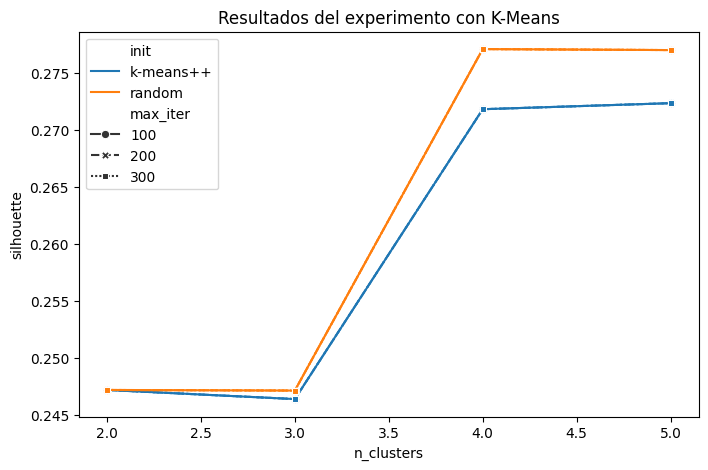

In [88]:
plt.figure(figsize=(8,5))
sns.lineplot(data=resultados_df, x='n_clusters', y='silhouette', hue='init', style='max_iter', markers=True)
plt.title('Resultados del experimento con K-Means')
plt.show()